# Core Class For Each Number

In [1]:
class Entity:

	def __init__(self, data, _children = (), _op=''):
		
		self.data = data

		self._prev = set(_children)

		self._op = _op

	def __repr__(self):
		return f"Entity({self.data})"

	def __add__(self, other):

		return Entity(self.data + other.data, _children = (self, other), _op = '+')
	
	def __mul__(self, other):

		return Entity(self.data * other.data, _children = (self, other), _op = '*')

In [2]:
# small test

a = Entity(4)
b = Entity(2)
c = Entity(3)

e = Entity(5)

d = a + b + c

e = d * a

In [3]:
d, e

(Entity(9), Entity(36))

In [4]:
d._prev, e._prev

({Entity(3), Entity(6)}, {Entity(4), Entity(9)})

## Function for iterating over entire structure

In [5]:
def trace(root):
	nodes, edges = set(), set()
	def build(v):
		if v not in nodes:
			nodes.add(v)
			for child in v._prev:
				edges.add((child, v))
				build(child)
	build(root)
	return nodes, edges

trace(e)

({Entity(2), Entity(3), Entity(36), Entity(4), Entity(6), Entity(9)},
 {(Entity(2), Entity(6)),
  (Entity(3), Entity(9)),
  (Entity(4), Entity(36)),
  (Entity(4), Entity(6)),
  (Entity(6), Entity(9)),
  (Entity(9), Entity(36))})

In [6]:
def trace(root):
    # Sets to store visited nodes and discovered edges.
    nodes, edges = set(), set()
    
    def build(v, depth=0):
        indent = ' ' * (depth * 2)  # Indentation to visually represent recursion depth
        print(f"{indent}>>> Entering node: {v} (Depth {depth})")
        
        # If we haven't visited this node yet, process it.
        if v not in nodes:
            print(f"{indent}Processing node: {v} (first time encountered)")
            nodes.add(v)
            print(f"{indent}Nodes so far: {nodes}")
            
            # Traverse each connected node via the _prev attribute.
            for child in v._prev:
                print(f"{indent}  -> About to traverse from parent {v} to child {child}")
                edges.add((child, v))
                print(f"{indent}     Edge added: ({child}, {v})")
                print(f"{indent}     Edges so far: {edges}")
                build(child, depth + 1)  # Recursive call for the child
            print(f"{indent}No more children for node: {v}.")
        else:
            # If the node has been processed already, indicate that we're skipping it.
            print(f"{indent}Node {v} already processed. Skipping recursion on this node.")
        
        print(f"{indent}<<< Exiting node: {v} (Returning to previous level)")
        # Optionally, print the current state of nodes and edges at exit.
        print(f"{indent}Current state at exit from {v}:")
        print(f"{indent}  Visited nodes: {nodes}")
        print(f"{indent}  Discovered edges: {edges}")
    
    # Start the recursion from the root node.
    build(root)
    
    # Final state after full recursion.
    print("=== Recursion complete ===")
    print(f"Final visited nodes: {nodes}")
    print(f"Final discovered edges: {edges}")
    return nodes, edges


trace(e)

>>> Entering node: Entity(36) (Depth 0)
Processing node: Entity(36) (first time encountered)
Nodes so far: {Entity(36)}
  -> About to traverse from parent Entity(36) to child Entity(9)
     Edge added: (Entity(9), Entity(36))
     Edges so far: {(Entity(9), Entity(36))}
  >>> Entering node: Entity(9) (Depth 1)
  Processing node: Entity(9) (first time encountered)
  Nodes so far: {Entity(9), Entity(36)}
    -> About to traverse from parent Entity(9) to child Entity(6)
       Edge added: (Entity(6), Entity(9))
       Edges so far: {(Entity(6), Entity(9)), (Entity(9), Entity(36))}
    >>> Entering node: Entity(6) (Depth 2)
    Processing node: Entity(6) (first time encountered)
    Nodes so far: {Entity(9), Entity(6), Entity(36)}
      -> About to traverse from parent Entity(6) to child Entity(4)
         Edge added: (Entity(4), Entity(6))
         Edges so far: {(Entity(6), Entity(9)), (Entity(4), Entity(6)), (Entity(9), Entity(36))}
      >>> Entering node: Entity(4) (Depth 3)
      Pro

({Entity(2), Entity(3), Entity(36), Entity(4), Entity(6), Entity(9)},
 {(Entity(2), Entity(6)),
  (Entity(3), Entity(9)),
  (Entity(4), Entity(36)),
  (Entity(4), Entity(6)),
  (Entity(6), Entity(9)),
  (Entity(9), Entity(36))})

# My version of Class and Build function

## My Class Definition

In [7]:
import math
import numpy as np


class myentity:
	def __init__(self, value, _prev = "", _op="", label=""):
		self.data = value
		self._prev = _prev
		self._op = _op
		self.label = label
		self.grad = 0.0
		self._backward = lambda: None

	def __str__(self):
		return f"This is my entity class, meant for print statements, has value {self.data}, and type {type(self.data)}, and label {self.label}, and children {self._prev}"

	def __repr__(self):
		return f"Entity has value: {self.data}, label: {self.label}, op: {self._op}"

	def __add__(self, other):
		other = other if isinstance(other, myentity) else myentity(other)
		out = myentity(self.data + other.data, _prev=(self, other), _op='+') 
		def _backward():
			self.grad += out.grad * 1
			other.grad += out.grad * 1

		out._backward = _backward

		return out
	
	def __sub__(self, other):
		other = other if isinstance(other, myentity) else myentity(other)
		out = myentity(self.data - other.data, _prev=(self, other), _op='-') 

		def _backward():
			self.grad += out.grad * 1
			other.grad += out.grad * -1

		out._backward = _backward

		return out
	
	def __truediv__(self, other):
		other = other if isinstance(other, myentity) else myentity(other)
		out =  myentity(self.data / other.data, _prev=(self, other), _op='/') 

		def _backward():
			self.grad += out.grad * (1/other.data)
			other.grad += out.grad * (-self.data/other.data**2)

		out._backward = _backward

		return out

	#def __truediv__(self, other): # self / other
	#	return self * other**-1

	def __mul__(self, other):
		other = other if isinstance(other, myentity) else myentity(other)
		out =  myentity(self.data * other.data, _prev=(self, other), _op='*') 

		def _backward():
			self.grad += out.grad * other.data
			other.grad += out.grad * self.data
		
		out._backward = _backward

		return out
	
	def __pow__(self, other):
		assert isinstance(other, (int, float)), "Power must be int or float"
		out = myentity(self.data ** other, _prev=(self,), _op='**') 

		def _backward():
			self.grad += out.grad * other * (self.data ** (other - 1))
			

		out._backward = _backward

		return out
	
	def exp(self):
		out = myentity(math.exp(self.data), _prev=(self,), _op='exp')
		def _backward():
			self.grad += out.grad * out.data

		out._backward = _backward

		return out
	
	def tanh(self):
		out = myentity(math.tanh(self.data), _prev=(self,), _op='tanh')

		def _backward():
			self.grad += out.grad * (1 - out.data ** 2)

		out._backward = _backward

		return out
	
	def __rmul__(self, other):
		return self.__mul__(other)
	
	def __radd__(self, other):
		return self.__add__(other)
	
	def __rsub__(self, other):
		return self.__sub__(other)
	
	def __rtruediv__(self, other):
		return self.__truediv__(other)
	

	
	#def backward(self):
	#	nodes = set()
		
	#	def navigate(node):
	#		if node not in nodes:
	#			nodes.add(node)
	#			node._backward()
	#			for child in node._prev:
	#				navigate(child)

	#	self.grad = 1
	#	navigate(self)

	#	return self

	def backward(self):
		visited = set()
		topo = []

		def build_topo(node):
			if node not in visited:
				visited.add(node)
				#print(node)
				for child in node._prev:
					build_topo(child)
				
				topo.append(node)


		build_topo(self)


		self.grad = 1
		for node in reversed(topo):
			node._backward()



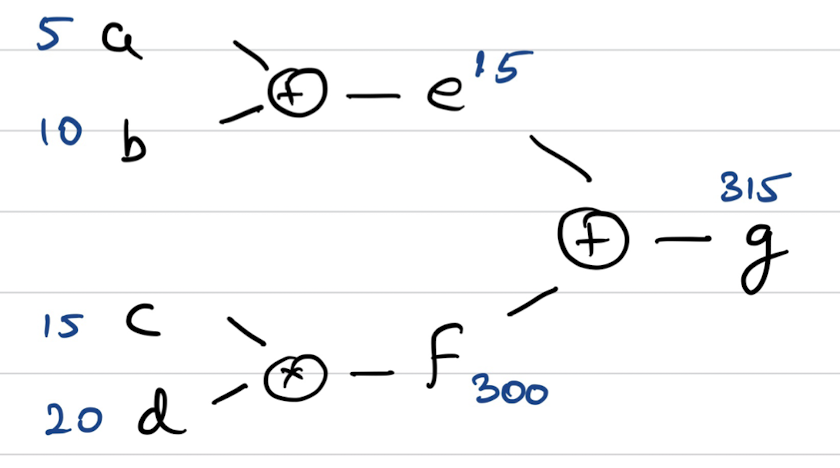

In [8]:
a = myentity(5, label="a")
b = myentity(10, label="b")
c = myentity(15, label="c")
d = myentity(20, label="d")

e = a + b; e.label = "e"
f = c * d; f.label = "f"
g = e + f; g.label = "g"

h = myentity(100, label="h")
i = g * h; i.label = "i"
i.backward()

print(a)
a

This is my entity class, meant for print statements, has value 5, and type <class 'int'>, and label a, and children 


Entity has value: 5, label: a, op: 

In [9]:
a / b

Entity has value: 0.5, label: , op: /

In [10]:
g

Entity has value: 315, label: g, op: +

In [11]:
g._prev

(Entity has value: 15, label: e, op: +, Entity has value: 300, label: f, op: *)

In [12]:
e._prev

(Entity has value: 5, label: a, op: , Entity has value: 10, label: b, op: )

In [13]:
f._op

'*'

## Trace and Draw Function

In [14]:
#!pip install graphviz


In [15]:
from graphviz import Digraph


In [16]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges



In [17]:
trace(g)

({Entity has value: 10, label: b, op: ,
  Entity has value: 15, label: c, op: ,
  Entity has value: 15, label: e, op: +,
  Entity has value: 20, label: d, op: ,
  Entity has value: 300, label: f, op: *,
  Entity has value: 315, label: g, op: +,
  Entity has value: 5, label: a, op: },
 {(Entity has value: 10, label: b, op: ,
   Entity has value: 15, label: e, op: +),
  (Entity has value: 15, label: c, op: ,
   Entity has value: 300, label: f, op: *),
  (Entity has value: 15, label: e, op: +,
   Entity has value: 315, label: g, op: +),
  (Entity has value: 20, label: d, op: ,
   Entity has value: 300, label: f, op: *),
  (Entity has value: 300, label: f, op: *,
   Entity has value: 315, label: g, op: +),
  (Entity has value: 5, label: a, op: ,
   Entity has value: 15, label: e, op: +)})

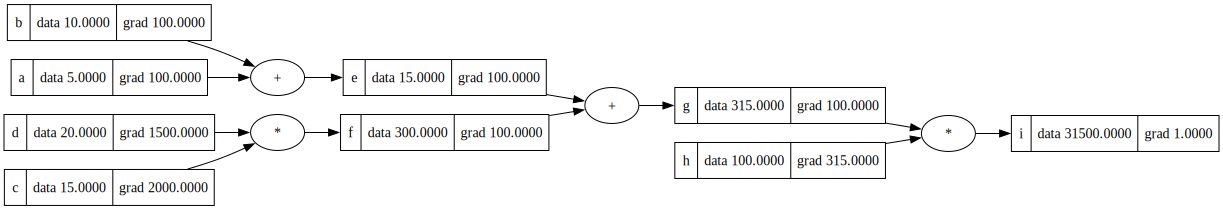

In [18]:


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{  %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        #remove grad
        #dot.node(name=str(id(n)), label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

draw_dot(i)

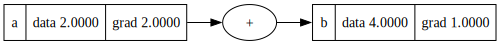

In [19]:
a = myentity(2, label='a')
b = a + a; b.label = 'b'

b.backward(
)

draw_dot(b)

## Testing with Sample NN Arch

In [20]:
#inputs x1, x2
x1 = myentity(2, label='x1')
x2 = myentity(0.0, label='x2')

#weights w1, w2
w1 = myentity(-3, label='w1')
w2 = myentity(1, label='w2')

#bias
b = myentity(6.8813735870195432, label='b')

#output
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

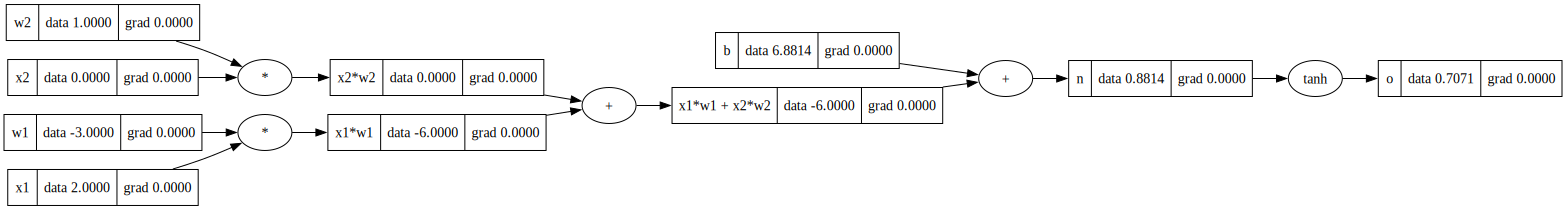

In [21]:
# vanilla network with grad all 0
draw_dot(o)

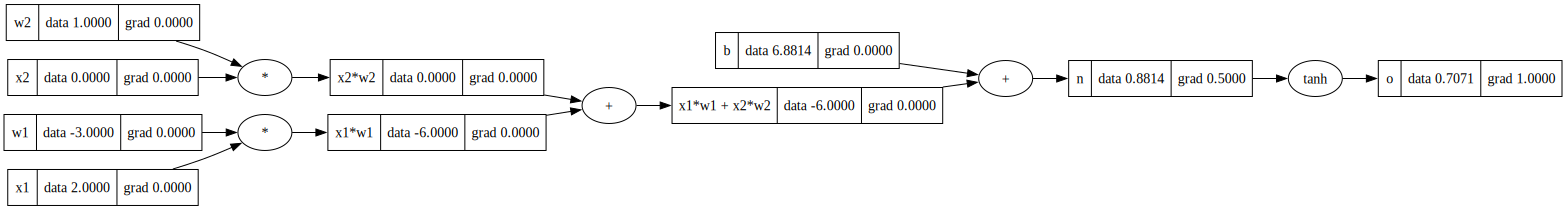

In [22]:
o.grad = 1
o._backward()
draw_dot(o)

In [23]:
breal

NameError: name 'breal' is not defined

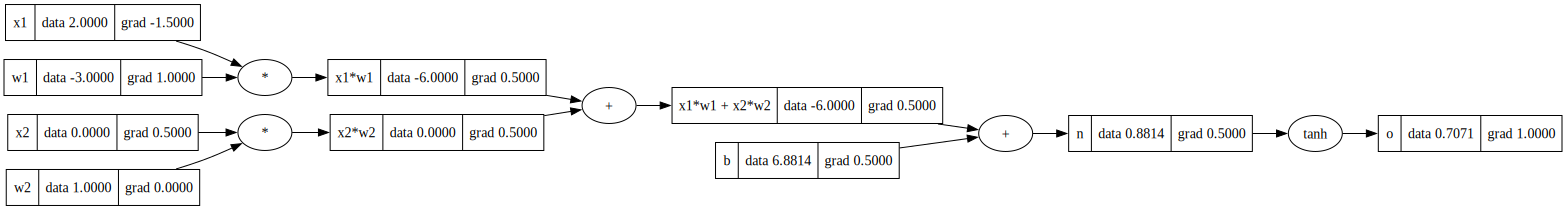

In [ ]:
o.backward()
draw_dot(o)

In [ ]:
#inputs x1, x2
x1 = myentity(2, label='x1')
x2 = myentity(0.0, label='x2')

#weights w1, w2
w1 = myentity(-3, label='w1')
w2 = myentity(1, label='w2')

#bias
b = myentity(6.8813735870195432, label='b')

#output
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'
e = (2 * n).exp(); e.label = 'e'
o = (e - 1) / (e + 1);
o.label = 'o'

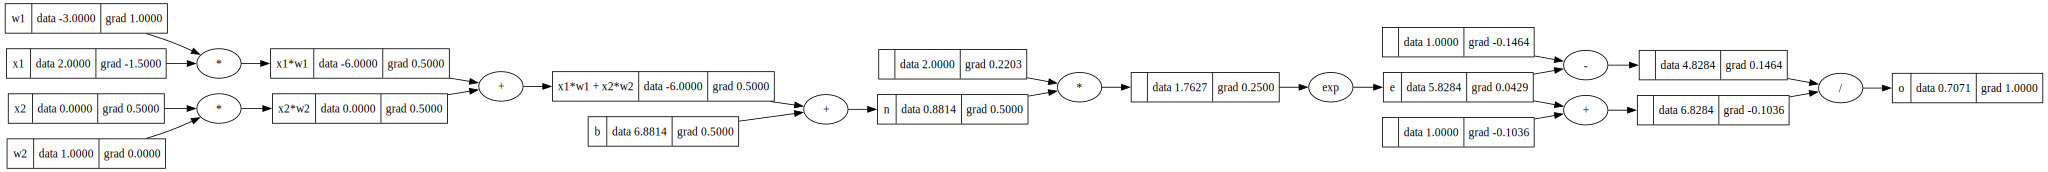

In [ ]:
o.backward()
draw_dot(o)

## Creating Neural Network Class

In [ ]:
class Neuron:

	def __init__(self, n_units):

		self.w = [myentity(np.random.uniform(-1, 1)) for _ in range(n_units)]
		self.b = myentity(np.random.uniform(-1, 1))

	def __call__(self, x):
		out1 = sum((w * x for w, x in zip(self.w, x)), self.b)
		out = out1.tanh()
		return out
	
	def parameters(self):
		return self.w + [self.b]
	

class Layer:

	def __init__(self, n_inputs, n_outputs):
		self.neurons = [Neuron(n_inputs) for n in range(n_outputs)]

	def __call__(self, x):
		out = [neuron(x) for neuron in self.neurons]
		return out[0] if len(out) == 1 else out
	
	def parameters(self):
		return [param for neuron in self.neurons for param in neuron.parameters()]


class MLP:

	def __init__(self, n_in, n_out_list):
		traverse = [n_in] + n_out_list

		self.nn = [Layer(traverse[i], traverse[i+1]) for i in range(len(n_out_list))]


	def __call__(self, x):
		for layer in self.nn:
			x = layer(x)
		
		return x
	
	def parameters(self):
		return [param for layer in self.nn for param in layer.parameters()]



x = [1, 2, 3]
#n = Layer(2, 3)

mlp = MLP(2, [4, 4, 1])
mlp(x)
	

Entity has value: 0.11219175338235389, label: , op: tanh

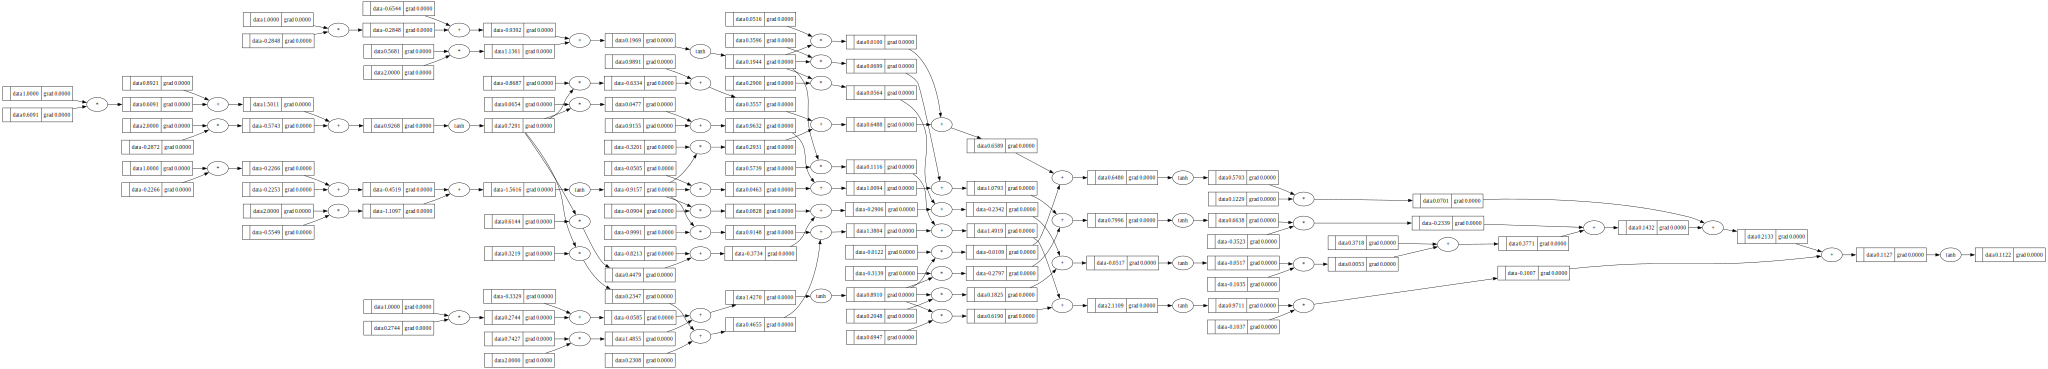

In [ ]:
draw_dot(mlp(x))

In [ ]:
mlp.parameters()

[Entity has value: 0.6090758042821602, label: , op: ,
 Entity has value: -0.287158451144649, label: , op: ,
 Entity has value: 0.8920631262912737, label: , op: ,
 Entity has value: -0.2265616646141635, label: , op: ,
 Entity has value: -0.5548633196352386, label: , op: ,
 Entity has value: -0.22529440431208125, label: , op: ,
 Entity has value: -0.2848086146283657, label: , op: ,
 Entity has value: 0.56807157848544, label: , op: ,
 Entity has value: -0.6544159131886402, label: , op: ,
 Entity has value: 0.2744122239532074, label: , op: ,
 Entity has value: 0.7427476561301793, label: , op: ,
 Entity has value: -0.3329303091238298, label: , op: ,
 Entity has value: 0.6143772645354457, label: , op: ,
 Entity has value: -0.09039668579923665, label: , op: ,
 Entity has value: 0.28999432379655854, label: , op: ,
 Entity has value: 0.20479200286470012, label: , op: ,
 Entity has value: -0.8213018140828106, label: , op: ,
 Entity has value: 0.06541673484266042, label: , op: ,
 Entity has value

In [ ]:
xs = [
	[2.0, 3.0, -1.0],
	[3.0, -1.0, 0.5],
	[0.5, 1.0, 1.0],
	[1.0, 0.0, -1.0]
]

ys = [1, 0, 1, 0]

ypred = [mlp(x) for x in xs]

ypred

[Entity has value: 0.07387085050357821, label: , op: tanh,
 Entity has value: 0.20487377312421268, label: , op: tanh,
 Entity has value: 0.14460259833629588, label: , op: tanh,
 Entity has value: 0.17921626941923272, label: , op: tanh]

In [ ]:
loss = sum([(yout - ygt)**2 for yout, ygt in zip(ypred, ys)])
loss

Entity has value: 8.718972777569732, label: , op: +

In [ ]:
loss.backward()

In [ ]:
mlp.nn[0].neurons[0].w[0].grad

0.21672888460605422

In [ ]:
epochs = 200

for epoch in range(epochs):
	loss = sum([(yout - ygt)**2 for yout, ygt in zip(ypred, ys)])
	loss.backward()
	
	for param in mlp.parameters():
		param.data -= 0.01 * param.grad
		param.grad = 0.0
	
	ypred = [mlp(x) for x in xs]
	print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 0.6339529395977237
Epoch 1, Loss: 0.6121302086720691
Epoch 2, Loss: 0.5903225049018958
Epoch 3, Loss: 0.568667375505929
Epoch 4, Loss: 0.5473135208169556
Epoch 5, Loss: 0.5264112222952595
Epoch 6, Loss: 0.5061031767710564
Epoch 7, Loss: 0.48651659891832283
Epoch 8, Loss: 0.4677572895150426
Epoch 9, Loss: 0.4499060535872127
Epoch 10, Loss: 0.4330174883722583
Epoch 11, Loss: 0.4171208440766322
Epoch 12, Loss: 0.4022224551639516
Epoch 13, Loss: 0.3883091646789698
Epoch 14, Loss: 0.3753521986175794
Epoch 15, Loss: 0.36331105135175024
Epoch 16, Loss: 0.3521370747323527
Epoch 17, Loss: 0.341776590706138
Epoch 18, Loss: 0.33217345164199685
Epoch 19, Loss: 0.32327104749499846
Epoch 20, Loss: 0.31501380581592053
Epoch 21, Loss: 0.30734825480732175
Epoch 22, Loss: 0.3002237276057224
Epoch 23, Loss: 0.2935927836359465
Epoch 24, Loss: 0.28741141486609334
Epoch 25, Loss: 0.2816390943379521
Epoch 26, Loss: 0.2762387135185521
Epoch 27, Loss: 0.27117644497818466
Epoch 28, Loss: 0.266421

In [ ]:
ypred

[Entity has value: 0.9117420744104151, label: , op: tanh,
 Entity has value: -0.1334120690060746, label: , op: tanh,
 Entity has value: 0.8233643515043925, label: , op: tanh,
 Entity has value: 0.17300110550066036, label: , op: tanh]